In [1]:
import glob

file_instru = "../2024-02-16 transiluminancia bolita EPSON+PWT/instru635_c01.asc"  #Response data filename 

directory = "../2024-02-16 transiluminancia bolita EPSON+PWT/635 nm"  # Directory where the experimental data is located
query = "P*.asc"    # Query for the experimental data files

file_data = sorted(glob.glob(directory + "/" + query))
print(file_data)

file_head = 9           #Number of header lines in data and response files (defualt for TCSPC=9)
file_result = ""        #Default addon to result filenames (empty)

ups_init = 0.5          #Initial ups
ua_init = 0.005         #Initial ua
t0_init = 0.2         #Initial t0
back_init = 0           #Initial background

sep = 40                #Slab thickness
ro = 0                  #Separation between the source and the optical axis 
gain = 2                #TCSPC temporal gain
n_ref = 1.4             #Refraction index

type_fit = 1            #Fitting type. 1: slab; 2: semi-infinite
t0_fixed = 1            #Fix t0?. 0: No; 1: Yes

cutThr = 0.01          #Threshold (as fraction of the max value) below cutting the data. Values lower than this will be zeroed.

['../2024-02-16 transiluminancia bolita EPSON+PWT/635 nm/P11.asc', '../2024-02-16 transiluminancia bolita EPSON+PWT/635 nm/P12.asc', '../2024-02-16 transiluminancia bolita EPSON+PWT/635 nm/P13.asc', '../2024-02-16 transiluminancia bolita EPSON+PWT/635 nm/P14.asc', '../2024-02-16 transiluminancia bolita EPSON+PWT/635 nm/P15.asc', '../2024-02-16 transiluminancia bolita EPSON+PWT/635 nm/P16.asc', '../2024-02-16 transiluminancia bolita EPSON+PWT/635 nm/P17.asc', '../2024-02-16 transiluminancia bolita EPSON+PWT/635 nm/P18.asc', '../2024-02-16 transiluminancia bolita EPSON+PWT/635 nm/P19.asc', '../2024-02-16 transiluminancia bolita EPSON+PWT/635 nm/P21.asc', '../2024-02-16 transiluminancia bolita EPSON+PWT/635 nm/P22.asc', '../2024-02-16 transiluminancia bolita EPSON+PWT/635 nm/P23.asc', '../2024-02-16 transiluminancia bolita EPSON+PWT/635 nm/P24.asc', '../2024-02-16 transiluminancia bolita EPSON+PWT/635 nm/P25.asc', '../2024-02-16 transiluminancia bolita EPSON+PWT/635 nm/P26.asc', '../2024-

In [2]:
import Fiteo3 as fit

results = fit.FitFunction(file_instru, file_data, file_result, ups_init, ua_init, t0_init, back_init,
            type_fit, t0_fixed, sep, ro, n_ref, file_head, gain, cutThr=cutThr, smoothStr=10)

Input values: ups = 0.5, ua = 0.005, t0 = 0.2, back = 0, sep = 40, ro = 0, n = 1.4

4096
10
4096
10
Fitting P11.asc ...
Cut values: 435...3951
Fitted values: 
ups: 1.0767251943751275, ua: 0.0006386220517952074, baseline correction: 0.00012711297043358483
Norm:  0.0061252946619539
_____________________
4096
10
4096
10
Fitting P12.asc ...
Cut values: 435...3951
Fitted values: 
ups: 1.078008155871463, ua: 0.000684947571687787, baseline correction: 0.00012453321506309732
Norm:  0.005890075937485608
_____________________
4096
10
4096
10
Fitting P13.asc ...
Cut values: 435...3950
Fitted values: 
ups: 1.0777480074948287, ua: 0.0007251283832873695, baseline correction: 0.00011548797138936077
Norm:  0.00598285061139078
_____________________
4096
10
4096
10
Fitting P14.asc ...
Cut values: 435...3951
Fitted values: 
ups: 1.0768686846086475, ua: 0.0007502539069195858, baseline correction: 0.00011491408779879809
Norm:  0.005667843429954867
_____________________
4096
10
4096
10
Fitting P15.asc ...
C

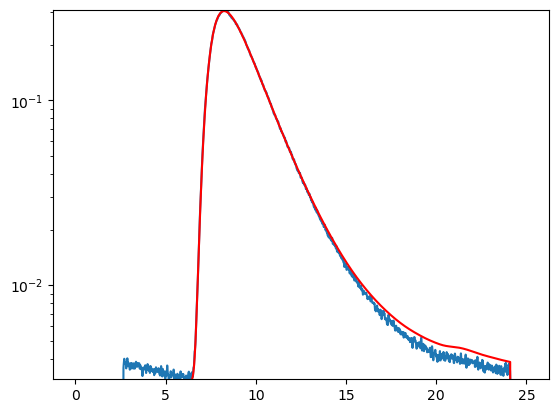

In [3]:
import matplotlib.pyplot as plt
import numpy as np

idTest = 10

fittedFunc = fit.funcion_fiteo_slab(results[idTest][7], results[idTest][1], results[idTest][2], results[idTest][3], results[idTest][4], n_ref, ro, sep, results[idTest][9], results[idTest][7], 0, len(results[idTest][8]))

plt.plot(results[idTest][7], results[idTest][8], label='Exp.') #cmap='viridis'
plt.plot(results[idTest][7], results[idTest][6], label='Fit', c='r')
plt.ylim(np.max(results[idTest][8])*cutThr, np.max(results[idTest][8]))
plt.yscale('log')
#plt.plot(results[1][8], fittedFunc, label='Fitted', c='g')

In [4]:
muas = []
for result in results:
    muas.append(results[result][2])
    
muas = np.array(muas)
print("Average mua: ", np.mean(muas))
muas = np.reshape(muas,(9,9))


mups = []
for result in results:
    mups.append(results[result][1])
    
mups = np.array(mups)
print("Average mups: ", np.mean(mups))
mups = np.reshape(mups,(9,9))

norms = []
for result in results:
    norms.append(results[result][5])
    
norms = np.array(norms)
print("Average norm: ", np.mean(norms))
norms = np.reshape(norms,(9,9))

t0s = []
for result in results:
    t0s.append(results[result][3])
    
t0s = np.array(t0s)
print("Average t0: ", np.mean(t0s))
t0s = np.reshape(t0s,(9,9))

print(np.shape(muas))

Average mua:  0.000786301909271173
Average mups:  1.069467782385582
Average norm:  0.007171514750330854
Average t0:  0.19999999999999998
(9, 9)


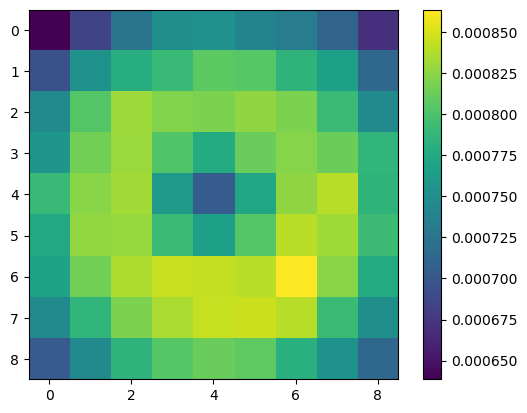

In [5]:
plt.imshow(muas, interpolation='nearest'),
plt.colorbar()
plt.savefig('muas.png')

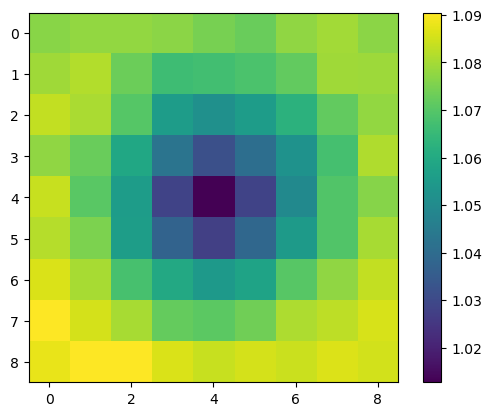

In [6]:
plt.imshow(mups, interpolation='nearest'),
plt.colorbar()
plt.savefig('mups.png')

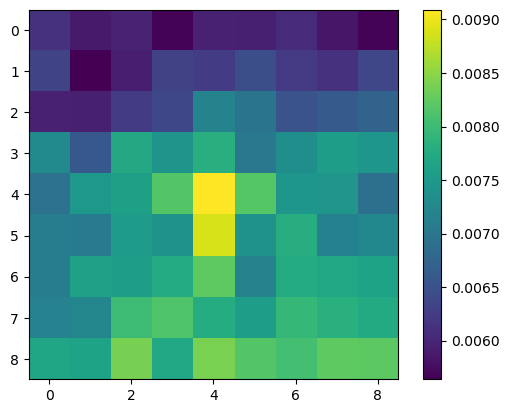

In [7]:
plt.imshow(norms, interpolation='nearest'),
plt.colorbar()
plt.savefig('norms.png')

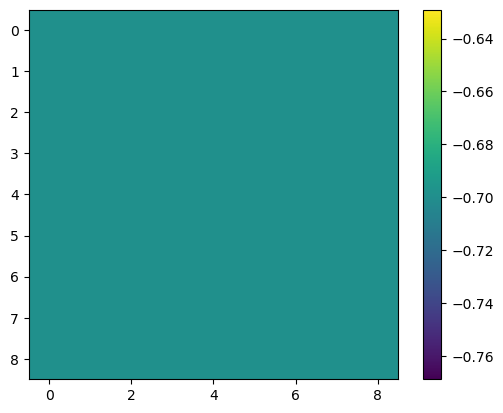

In [8]:
plt.imshow(np.log10(t0s), interpolation='nearest'),
plt.colorbar()
plt.savefig('t0s.png')